In [1]:
import sys
sys.path.append("..")     
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from writeit import *
import pickle
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
fi = "../indata/waterhammer.inp"
fc = "../indata/waterhammer.config"
mtype = 1
n0 = PyNetwork(fi,fc,mtype)
Ls = n0.Ls
N = n0.Ns[0]
Ns = [int(l) for l in Ls]               # Ns is a matrix instead of a number
a = n0.a[0]                      # a should be a number 1200 rather than [1200]
T =n0.T
Ds = n0.Ds
Mrs =n0.Mrs
M=n0.M
#dx=Ls/N
#M = int(T*a/(dx*.8))                          # M is a number

# set BC for junction 0 - reservoir
q=0.82*pi*Ds**2/4*(2*9.81*150)**0.5
Qin=q[0]*ones(M+1)

p0 = PyPipe_ps(N, Ds, Ls, M, a)
A00= p0.AofH(15.557,False)
Q00= q[0]
#n1.setIC(0,A00*ones(n1.Ns[0]), Q00*np.ones(n1.Ns[0]))
#n1.setbVal(0,Qin) 

In [3]:
#set other parameters these are only initial conditions and boundaryt types!!
jt=n0.nodeTypes
bt=[0,1]
bv=[A00,0.0]
r=[0,1]
h0s=[15.557]    
q0s=[0.01]
elevs=[0,0]
#Write new files
oldinp = "../indata/waterhammer.inp"
fn = "../indata/xin_waterhammer"
(fi, fc)=rewritePipes(fn,oldinp, Ns, Ls, Mrs, Ds, jt, bt, bv, r, h0s, q0s, T, M, a, elevs)
print  Ns, Ls, Mrs, Ds, jt, bt, bv, r, h0s, q0s, T, M, a, elevs

[600] [ 600.] [0.012] [ 0.5] [1 1] [0, 1] [0.19636966103224984, 0.0] [0, 1] [15.557] [0.01] 5.0 10000 1200.0 [0, 0]


Junction1s are [0 1]
junction 0 has A specified
junction 1 has reflection boundary condition


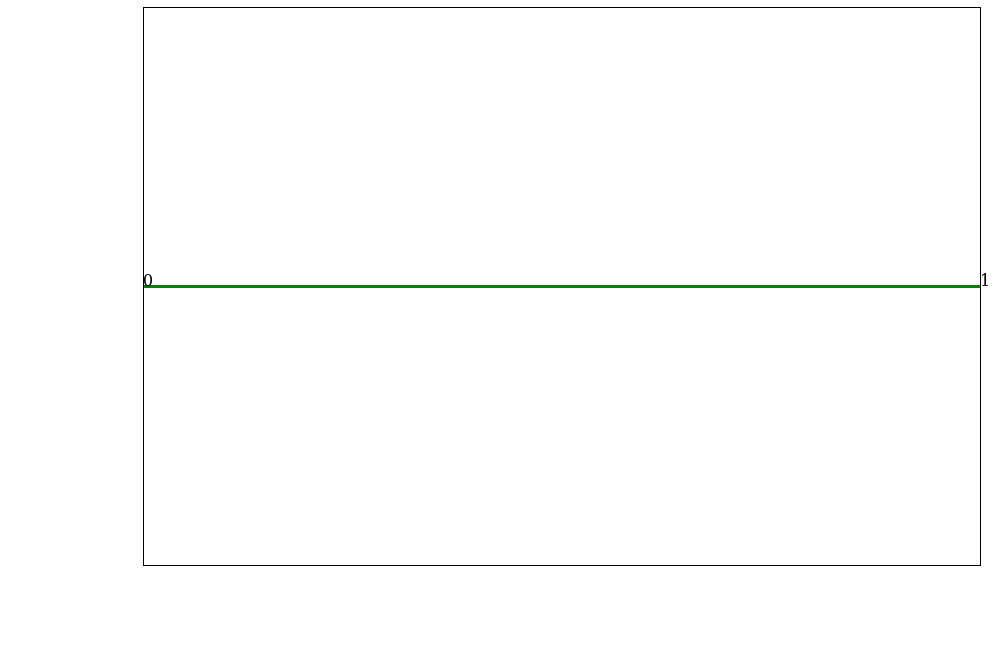

In [4]:
n1 = PyNetwork(fi,fc,mtype)
n1.setIC(0,A00*ones(n1.Ns[0]), 0.01*ones(N))
n1.setbVal(0,A00*ones(M+1))              # This is the bvalvalue, it is the boundary condtion!! It changes results!
(xs,ys,conns,ls) = getBasicConnectivity(fi)
Np= shape(conns) [0]
plotNetworkLayout (xs, ys, conns, ls, Np)   
#n1.showCurrentData()  
n1.showExternalBoundaries()

In [5]:
dt = n1.T/float(n1.M)

t0=time.clock()
n1.runForwardProblem(dt)
t1=time.clock()
print "simulation time is %f s"%(t1-t0)

simulation time is 4.233546 s


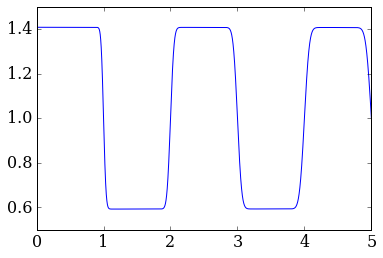

In [6]:
t = linspace(0,T,M+1)    
H = n1.pressureTimeSeries(0,N-1) 
H0=H[0]
Hnormal=H/H0
plot(t,Hnormal)